In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro as N_A
from scipy.constants import elementary_charge as q
from scipy.constants import Boltzmann as kB
from scipy.constants import epsilon_0 as eps0
from scipy.optimize import curve_fit
import eckstein_yield as eck
from uncertainties import ufloat
from uncertainties.umath import log as ulog
from uncertainties.umath import log10 as ulog10
import eckstein_yield as ey
import collision_erosion_library as cel
from clausing import simpleClausingFactor
import pandas as pd
pi = np.pi


In [8]:
# Load Wirz Time-Dependent data from fig11
measured_da_data = pd.read_csv('wirz-time_dependent_fig11.csv', names=['T', 'da'])


In [9]:
xdata      = measured_da_data['T'].to_numpy()
ydata      = measured_da_data['da'].to_numpy() / 2 # ra
popt, pcov = curve_fit(cel.accel_grid_erosion_funcV2, xdata, ydata)#, p0 = [2.11, 0.39])

In [10]:

residuals  = ydata - cel.accel_grid_erosion_funcV2(xdata, popt[0], popt[1])
sigma_ab   = np.sqrt(np.diagonal(pcov)) # standard deviation
ss_res     = np.sum(residuals**2)
ss_tot     = np.sum((ydata - np.mean(ydata))**2)
R2 = 1 - (ss_res / ss_tot)
print(f"R2 = {R2:0.3}")
print(f"sigma_ab = {sigma_ab}")
a = popt[0]
b = popt[1]

R2 = 0.946
sigma_ab = [0.02275455 0.06130443]


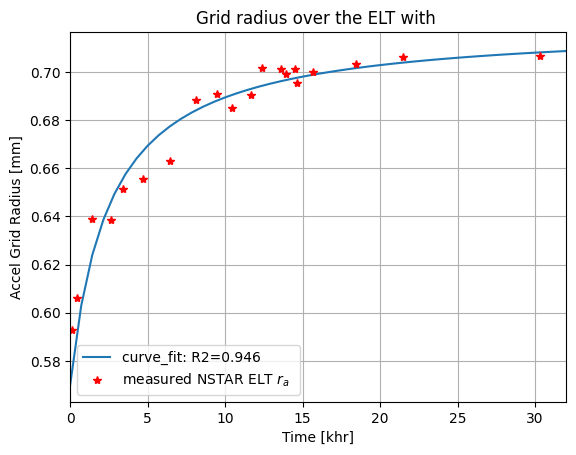

In [11]:
t = np.linspace(0,35)
xfit1   = cel.accel_grid_erosion_funcV2(t, a, b)
#upper_bound = cel.accel_grid_erosion_funcV2(t, a+2*sigma_ab[0], b+2*sigma_ab[1])
#lower_bound = accel_grid_erosion_func(t, a-2*sigma_ab[0], b-2*sigma_ab[1])

#plt.fill_between(t, lower_bound, upper_bound,
#                 color = 'black', alpha = 0.15, label=r"$\pm 2\sigma$ bounds")
plt.plot(t, xfit1, label=f'curve_fit: R2={R2:0.3}')

plt.plot(xdata, ydata, 'r*', label = r"measured NSTAR ELT $r_a$  ")
plt.grid(which='both')
plt.xlabel('Time [khr]')
plt.ylabel('Accel Grid Radius [mm]')
plt.xlim([0,32])
plt.title('Grid radius over the ELT with ')
plt.legend()

In [6]:
a = popt[0]
b = popt[1]
print(f"a = {popt[0]:0.3f}")
print(f"b = {popt[1]:0.3f}")

a = 0.672
b = 0.395


In [ ]:
t = np.linspace(0,50)
dPdt = dfdt(t, a, b)
P = f(t, a, b)
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
axs[0].plot(t, P)
axs[1].plot(t, dPdt)

In [ ]:
x = np.linspace(1,100)
y_log10 = np.log10(x)
y_loge = np.log(x)

plt.plot(x, y_log10, label = r'$log_10$')
plt.plot(x, y_loge, label = r'$log_e$')
plt.legend()
